<a href="https://colab.research.google.com/github/mohammadreza490/ML_Models/blob/main/MNIST_hand_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"mohammadreza490","key":"2995d91b48901a01acbb44fc4be22729"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          17913  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10655  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5304  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3829  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle competitions download -c 'Digit-Recognizer'

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip train.csv.zip


Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [ ]:
import pandas as pd

In [ ]:
traindf=pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
X_traindf = traindf.drop("label", axis=1)
y_traindf = traindf["label"]

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
X_train = tf.constant(X_traindf)
y_train = tf.constant(y_traindf)

In [ ]:
X_train.shape, y_train.shape

(TensorShape([42000, 784]), TensorShape([42000]))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
y_train_ohe = ohe.fit_transform(tf.expand_dims(y_train, axis=1))

In [ ]:
y_train_one_hot_encoded = tf.constant(y_train_ohe.toarray())
y_train_one_hot_encoded

<tf.Tensor: shape=(42000, 10), dtype=float64, numpy=
array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])>

In [ ]:
import matplotlib.pyplot as plt
import random
#Let's visualise some of the digits
def plot_random_sample():

  random_index = random.randint(0, 42001)
  plt.imshow(tf.reshape(X_train, (42000, 28, 28))[random_index], cmap="Greys")
  plt.xlabel(f"The sample label is {y_train[random_index].numpy()}")

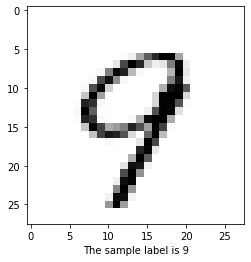

In [ ]:
plot_random_sample()

In [ ]:
X_train, y_train_one_hot_encoded

(<tf.Tensor: shape=(42000, 784), dtype=int64, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])>,
 <tf.Tensor: shape=(42000, 10), dtype=float64, numpy=
 array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])>)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(np.array(X_train), np.array(y_train_one_hot_encoded), train_size=0.8, random_state=42)
#this doesn't work with tensors. converted to numpy array and it worked


In [ ]:
X_train = tf.constant(X_train)
X_validation = tf.constant(X_validation)
y_train = tf.constant(y_train)
y_validation = tf.constant(y_validation)

In [ ]:
#Let's build our model
model_1 = tf.keras.Sequential([
          tf.keras.layers.InputLayer(input_shape=(784, )),
          tf.keras.layers.Dense(10, activation="relu"),
          tf.keras.layers.Dense(10, activation="relu"),
          tf.keras.layers.Dense(10, activation="sigmoid"),
])

model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["acc"])



In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=30, batch_size= 32,  validation_data=(X_validation, y_validation),)

Epoch 1/30
1050/1050 [==============================] - 10s 9ms/step - loss: 2.2619 - acc: 0.4560 - val_loss: 1.1626 - val_acc: 0.6587
Epoch 2/30
1050/1050 [==============================] - 9s 9ms/step - loss: 0.9530 - acc: 0.7256 - val_loss: 0.8565 - val_acc: 0.7461
Epoch 3/30
1050/1050 [==============================] - 9s 9ms/step - loss: 0.7333 - acc: 0.7944 - val_loss: 0.7073 - val_acc: 0.8067
Epoch 4/30
1050/1050 [==============================] - 8s 7ms/step - loss: 0.6179 - acc: 0.8282 - val_loss: 0.6120 - val_acc: 0.8404
Epoch 5/30
1050/1050 [==============================] - 8s 8ms/step - loss: 0.5317 - acc: 0.8557 - val_loss: 0.5633 - val_acc: 0.8464
Epoch 6/30
1050/1050 [==============================] - 8s 8ms/step - loss: 0.4755 - acc: 0.8724 - val_loss: 0.4625 - val_acc: 0.8765
Epoch 7/30
1050/1050 [==============================] - 8s 8ms/step - loss: 0.4339 - acc: 0.8835 - val_loss: 0.4398 - val_acc: 0.8817
Epoch 8/30
1050/1050 [==============================] - 8s 8m

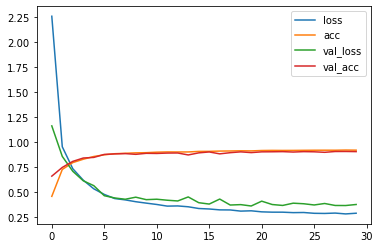

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
X_test= tf.constant(testdf)

In [ ]:
model_1.evaluate(X_validation, y_validation)

263/263 [==============================] - 2s 6ms/step - loss: 0.3745 - acc: 0.9045


[0.3744618594646454, 0.9045237898826599]

In [ ]:
#let's normalize the data and train again
X_train = tf.cast(X_train, tf.float64) /255.
X_validation = tf.cast(X_validation, tf.float64) /255.

In [ ]:
#Let's build our model
model_1_normalised = tf.keras.Sequential([
          tf.keras.layers.InputLayer(input_shape=(784, )),
          tf.keras.layers.Dense(10, activation="relu"),
          tf.keras.layers.Dense(10, activation="relu"),
          tf.keras.layers.Dense(10, activation="sigmoid"),
])

model_1_normalised.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["acc"])



In [ ]:
history_1_normalised = model_1_normalised.fit(X_train, y_train, epochs=30, batch_size= 32,  validation_data=(X_validation, y_validation),)

Epoch 1/30
1050/1050 [==============================] - 9s 8ms/step - loss: 0.8186 - acc: 0.7380 - val_loss: 0.4088 - val_acc: 0.8802
Epoch 2/30
1050/1050 [==============================] - 8s 7ms/step - loss: 0.3579 - acc: 0.8952 - val_loss: 0.3311 - val_acc: 0.9031
Epoch 3/30
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2951 - acc: 0.9133 - val_loss: 0.2984 - val_acc: 0.9149
Epoch 4/30
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2572 - acc: 0.9236 - val_loss: 0.2723 - val_acc: 0.9213
Epoch 5/30
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2354 - acc: 0.9306 - val_loss: 0.2659 - val_acc: 0.9233
Epoch 6/30
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2199 - acc: 0.9360 - val_loss: 0.2503 - val_acc: 0.9285
Epoch 7/30
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2077 - acc: 0.9385 - val_loss: 0.2636 - val_acc: 0.9225
Epoch 8/30
1050/1050 [==============================] - 5s 5ms

we can see the model is learning much more quickly with normalised data

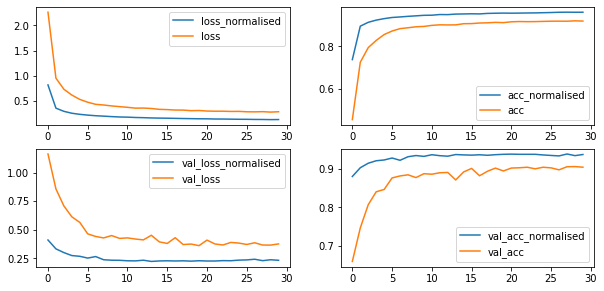

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)

plt.plot(history_1_normalised.history["loss"], label="loss_normalised")
plt.plot(history_1.history["loss"], label="loss")
plt.legend()
plt.subplot(4, 2, 2)

plt.plot(history_1_normalised.history["acc"], label="acc_normalised")
plt.plot(history_1.history["acc"], label="acc")
plt.legend()

plt.subplot(4, 2, 3)

plt.plot(history_1_normalised.history["val_loss"], label="val_loss_normalised")
plt.plot(history_1.history["val_loss"], label="val_loss")
plt.legend()
plt.subplot(4, 2, 4)

plt.plot(history_1_normalised.history["val_acc"], label="val_acc_normalised")
plt.plot(history_1.history["val_acc"], label="val_acc")
plt.legend()

Normalised model is performing much better than the other one

In [ ]:
#Let's build a cnn model
model_2 = tf.keras.Sequential([
          tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
          tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding="same",),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding="same",),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding="same",),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(10, activation="sigmoid"),
         
])

model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["acc"])



<tf.Tensor: shape=(33600, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [ ]:
history_2 = model_2.fit(tf.reshape(X_train, (-1, 28, 28)), y_train, epochs=10, batch_size= 32, validation_data= (tf.reshape(X_validation, (-1, 28, 28)), y_validation))

Epoch 1/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.4471 - acc: 0.8639 - val_loss: 0.2424 - val_acc: 0.9242
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1546 - acc: 0.9535 - val_loss: 0.1341 - val_acc: 0.9602
Epoch 3/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1154 - acc: 0.9650 - val_loss: 0.1276 - val_acc: 0.9593
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0952 - acc: 0.9708 - val_loss: 0.1009 - val_acc: 0.9696
Epoch 5/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0848 - acc: 0.9740 - val_loss: 0.0881 - val_acc: 0.9737
Epoch 6/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0745 - acc: 0.9770 - val_loss: 0.1004 - val_acc: 0.9683
Epoch 7/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0684 - acc: 0.9788 - val_loss: 0.0835 - val_acc: 0.9740
Epoch 8/10
1050/1050 [==============================] - 6s 6ms

In [ ]:
model_1.summary(), model_1_normalised.summary(), model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (

(None, None, None)

### We can see the CNN is performing much better with less epochs compare to normal DNNs
### It also has 1/4 trainable parameters compare to other models

In [ ]:
X_train = tf.cast(tf.constant(testdf), tf.float64) / 255.


In [ ]:
X_train

<tf.Tensor: shape=(28000, 784), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [ ]:
def plot_random_test_sample_predictions(sample):
  if sample == None:
    random_index = random.randint(0, 28000)
    sample = X_train[random_index]
  sample_reshaped = tf.reshape(sample, (-1, 28, 28))
  prediction = model_2.predict(sample_reshaped)
  label = tf.argmax(prediction[0])
  plt.imshow(tf.squeeze(sample_reshaped), cmap="Greys",)
  plt.xlabel(f"label predicted: {label} with {prediction[0][label]*100: .5f}% accuracy")
  return prediction

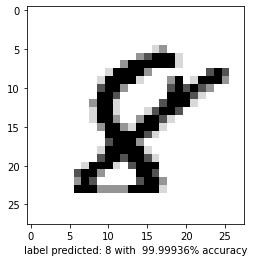

In [ ]:
plot_random_test_sample_predictions()

<tf.Tensor: shape=(), dtype=float32, numpy=0.473315>

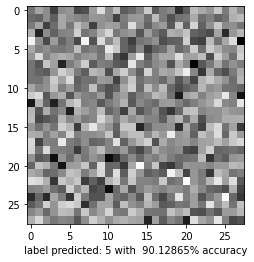

In [ ]:
g1 = tf.random.Generator.from_seed(1)
random_image = tf.cast(g1.normal(shape=[28, 28]), tf.float64)/255.
predicitons = plot_random_test_sample_predictions(random_image)
tf.reduce_mean(predicitons) #we can see this image was assigned to number 5
#but the mean of the predicitons is 0.47 which means each class on average has a 47% chance
#to accept this image => this prediciton can be said is random